<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/17%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv('sample_data/Measurement_info.csv', parse_dates=[0]) # index_col : join (merge) 하기 위해서

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885066 entries, 0 to 3885065
Data columns (total 5 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Measurement date   datetime64[ns]
 1   Station code       int64         
 2   Item code          int64         
 3   Average value      float64       
 4   Instrument status  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 148.2 MB


# Tidy Data = Join

In [45]:
item = pd.read_csv('sample_data/Measurement_item_info.csv')

In [46]:
station = pd.read_csv('sample_data/Measurement_station_info.csv')

In [47]:
station

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679
5,106,Mapo-gu,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",37.555580,126.905597
6,107,Seongdong-gu,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",37.541864,127.049659
7,108,Gwangjin-gu,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493
8,109,Dongdaemun-gu,"43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...",37.575743,127.028885
9,110,Jungnang-gu,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",37.584848,127.094023


In [48]:
item

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


In [49]:
seoul = data.merge(item).merge(station)

In [50]:
seoul.drop(columns=['Station code', 'Item code'], inplace=True)

In [51]:
seoul

,Measurement date,Average value,Instrument status,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red),Station name(district),Address,Latitude,Longitude
0,2017-01-01 00:00:00,0.004,0,SO2,ppm,0.02,0.05,0.15,1.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,2017-01-01 01:00:00,0.004,0,SO2,ppm,0.02,0.05,0.15,1.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
2,2017-01-01 02:00:00,0.004,0,SO2,ppm,0.02,0.05,0.15,1.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
3,2017-01-01 03:00:00,0.004,0,SO2,ppm,0.02,0.05,0.15,1.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
4,2017-01-01 04:00:00,0.003,0,SO2,ppm,0.02,0.05,0.15,1.0,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885061,2019-12-31 19:00:00,17.000,0,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0,Gangdong-gu,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792
3885062,2019-12-31 20:00:00,19.000,0,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0,Gangdong-gu,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792
3885063,2019-12-31 21:00:00,17.000,0,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0,Gangdong-gu,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792
3885064,2019-12-31 22:00:00,18.000,0,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0,Gangdong-gu,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792


In [52]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3885066 entries, 0 to 3885065
Data columns (total 13 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Measurement date        datetime64[ns]
 1   Average value           float64       
 2   Instrument status       int64         
 3   Item name               object        
 4   Unit of measurement     object        
 5   Good(Blue)              float64       
 6   Normal(Green)           float64       
 7   Bad(Yellow)             float64       
 8   Very bad(Red)           float64       
 9   Station name(district)  object        
 10  Address                 object        
 11  Latitude                float64       
 12  Longitude               float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(4)
memory usage: 415.0+ MB


In [53]:
def check(x):
    if x['Average value'] <= x['Good(Blue)']:
        return 'Blue'
    elif x['Good(Blue)'] < x['Average value'] <= x['Normal(Green)']:
        return 'Green'
    elif x['Normal(Green)'] < x['Average value'] <= x['Bad(Yellow)']:
        return 'Yellow'
    elif x['Bad(Yellow)'] < x['Average value'] <= x['Very bad(Red)']:
        return 'Red'

In [54]:
seoul['eval'] = seoul.apply(check, axis=1)

In [55]:
seoul['eval'].value_counts()

Blue      2659018
Green     1014547
Yellow     186861
Red         22320
Name: eval, dtype: int64

In [56]:
seoul['eval'] = seoul['eval'].astype('category')

In [57]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3885066 entries, 0 to 3885065
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Measurement date        datetime64[ns]
 1   Average value           float64       
 2   Instrument status       int64         
 3   Item name               object        
 4   Unit of measurement     object        
 5   Good(Blue)              float64       
 6   Normal(Green)           float64       
 7   Bad(Yellow)             float64       
 8   Very bad(Red)           float64       
 9   Station name(district)  object        
 10  Address                 object        
 11  Latitude                float64       
 12  Longitude               float64       
 13  eval                    category      
dtypes: category(1), datetime64[ns](1), float64(7), int64(1), object(4)
memory usage: 418.7+ MB


In [58]:
seoul.drop(columns=['Good(Blue)', 'Normal(Green)', 'Bad(Yellow)', 'Very bad(Red)'], inplace=True)

In [59]:
seoul

,Measurement date,Average value,Instrument status,Item name,Unit of measurement,Station name(district),Address,Latitude,Longitude,eval
0,2017-01-01 00:00:00,0.004,0,SO2,ppm,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Blue
1,2017-01-01 01:00:00,0.004,0,SO2,ppm,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Blue
2,2017-01-01 02:00:00,0.004,0,SO2,ppm,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Blue
3,2017-01-01 03:00:00,0.004,0,SO2,ppm,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Blue
4,2017-01-01 04:00:00,0.003,0,SO2,ppm,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,Blue
...,...,...,...,...,...,...,...,...,...,...
3885061,2019-12-31 19:00:00,17.000,0,PM2.5,Mircrogram/m3,Gangdong-gu,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,Green
3885062,2019-12-31 20:00:00,19.000,0,PM2.5,Mircrogram/m3,Gangdong-gu,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,Green
3885063,2019-12-31 21:00:00,17.000,0,PM2.5,Mircrogram/m3,Gangdong-gu,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,Green
3885064,2019-12-31 22:00:00,18.000,0,PM2.5,Mircrogram/m3,Gangdong-gu,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,Green


In [21]:
#Instrument status
#0: Normal, 1: Need for calibration, 2: Abnormal
#4: Power cut off, 8: Under repair, 9: abnormal data

In [60]:
seoul['Instrument status'].value_counts()

0    3775778
8      32341
1      29717
4      22752
9      20490
2       3988
Name: Instrument status, dtype: int64

In [61]:
seoul_normal = seoul[seoul['Instrument status'] == 0].copy()

In [62]:
seoul_normal.drop(columns='Instrument status', inplace=True)

In [63]:
seoul_normal.drop(columns=['Address', 'Unit of measurement'], inplace=True)

In [64]:
seoul_normal

,Measurement date,Average value,Item name,Station name(district),Latitude,Longitude,eval
0,2017-01-01 00:00:00,0.004,SO2,Jongno-gu,37.572016,127.005008,Blue
1,2017-01-01 01:00:00,0.004,SO2,Jongno-gu,37.572016,127.005008,Blue
2,2017-01-01 02:00:00,0.004,SO2,Jongno-gu,37.572016,127.005008,Blue
3,2017-01-01 03:00:00,0.004,SO2,Jongno-gu,37.572016,127.005008,Blue
4,2017-01-01 04:00:00,0.003,SO2,Jongno-gu,37.572016,127.005008,Blue
...,...,...,...,...,...,...,...
3885061,2019-12-31 19:00:00,17.000,PM2.5,Gangdong-gu,37.544962,127.136792,Green
3885062,2019-12-31 20:00:00,19.000,PM2.5,Gangdong-gu,37.544962,127.136792,Green
3885063,2019-12-31 21:00:00,17.000,PM2.5,Gangdong-gu,37.544962,127.136792,Green
3885064,2019-12-31 22:00:00,18.000,PM2.5,Gangdong-gu,37.544962,127.136792,Green


# Geo

## 지도상에 관측소 표시

In [65]:
import geopandas as gpd

In [66]:
seoul_normal_gpd = gpd.GeoDataFrame(seoul_normal,
                                    geometry=gpd.points_from_xy(seoul_normal.Longitude, seoul_normal.Latitude))

In [67]:
seoul_normal_gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3775778 entries, 0 to 3885065
Data columns (total 8 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Measurement date        datetime64[ns]
 1   Average value           float64       
 2   Item name               object        
 3   Station name(district)  object        
 4   Latitude                float64       
 5   Longitude               float64       
 6   eval                    category      
 7   geometry                geometry      
dtypes: category(1), datetime64[ns](1), float64(3), geometry(1), object(2)
memory usage: 234.1+ MB


In [68]:
seoul_normal_gpd_time = seoul_normal_gpd.set_index('Measurement date')

In [69]:
seoul_normal_gpd_time['Item name'].unique()

array(['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5'], dtype=object)

In [70]:
seoul_normal_gpd_time['Station name(district)'].unique()

array(['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Eunpyeong-gu',
       'Seodaemun-gu', 'Mapo-gu', 'Seongdong-gu', 'Gwangjin-gu',
       'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu', 'Gangbuk-gu',
       'Dobong-gu', 'Nowon-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu',
       'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu',
       'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu'],
      dtype=object)

In [71]:
seoul_normal_gpd_time.drop(columns=['Latitude','Longitude'], inplace=True)

In [72]:
seoul_normal_gpd_time

,Average value,Item name,Station name(district),eval,geometry
Measurement date,,,,,
2017-01-01 00:00:00,0.004,SO2,Jongno-gu,Blue,POINT (127.00501 37.57202)
2017-01-01 01:00:00,0.004,SO2,Jongno-gu,Blue,POINT (127.00501 37.57202)
2017-01-01 02:00:00,0.004,SO2,Jongno-gu,Blue,POINT (127.00501 37.57202)
2017-01-01 03:00:00,0.004,SO2,Jongno-gu,Blue,POINT (127.00501 37.57202)
2017-01-01 04:00:00,0.003,SO2,Jongno-gu,Blue,POINT (127.00501 37.57202)
...,...,...,...,...,...
2019-12-31 19:00:00,17.000,PM2.5,Gangdong-gu,Green,POINT (127.13679 37.54496)
2019-12-31 20:00:00,19.000,PM2.5,Gangdong-gu,Green,POINT (127.13679 37.54496)
2019-12-31 21:00:00,17.000,PM2.5,Gangdong-gu,Green,POINT (127.13679 37.54496)


In [73]:
seoul_normal_gpd_time.geometry.x

Measurement date
2017-01-01 00:00:00    127.005008
2017-01-01 01:00:00    127.005008
2017-01-01 02:00:00    127.005008
2017-01-01 03:00:00    127.005008
2017-01-01 04:00:00    127.005008
                          ...    
2019-12-31 19:00:00    127.136792
2019-12-31 20:00:00    127.136792
2019-12-31 21:00:00    127.136792
2019-12-31 22:00:00    127.136792
2019-12-31 23:00:00    127.136792
Length: 3775778, dtype: float64

#!!!important

In [74]:
def filtering(item, location, time):
    temp = seoul_normal_gpd_time[(seoul_normal_gpd_time['Item name'] == item) &
                                  (seoul_normal_gpd_time['Station name(district)'] == location) ]
    return temp.loc[time]

In [75]:
filtering('SO2', 'Gangnam-gu', '2017-01-01')

,Average value,Item name,Station name(district),eval,geometry
Measurement date,,,,,
2017-01-01 00:00:00,0.005,SO2,Gangnam-gu,Blue,POINT (127.04747 37.51753)
2017-01-01 01:00:00,0.005,SO2,Gangnam-gu,Blue,POINT (127.04747 37.51753)
2017-01-01 02:00:00,0.004,SO2,Gangnam-gu,Blue,POINT (127.04747 37.51753)
2017-01-01 03:00:00,0.004,SO2,Gangnam-gu,Blue,POINT (127.04747 37.51753)
2017-01-01 04:00:00,0.004,SO2,Gangnam-gu,Blue,POINT (127.04747 37.51753)
2017-01-01 05:00:00,0.005,SO2,Gangnam-gu,Blue,POINT (127.04747 37.51753)
2017-01-01 06:00:00,0.004,SO2,Gangnam-gu,Blue,POINT (127.04747 37.51753)
2017-01-01 07:00:00,0.004,SO2,Gangnam-gu,Blue,POINT (127.04747 37.51753)
2017-01-01 08:00:00,0.004,SO2,Gangnam-gu,Blue,POINT (127.04747 37.51753)


<Axes: xlabel='Measurement date'>

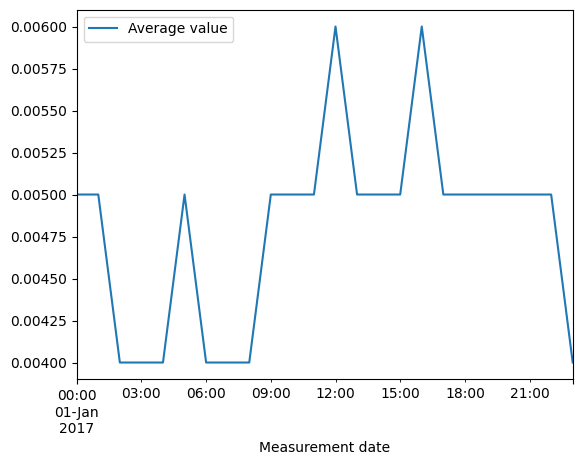

In [76]:
filtering('SO2', 'Gangnam-gu', '2017-01-01')[['Average value']].plot.line()

# c.f)

In [ ]:
filtering('SO2', 'Jongno-gu', '2017-01-01:2017-01-02')

In [77]:
def advanced_filtering(item, time=None, location=None):
    temp = seoul_normal_gpd_time[seoul_normal_gpd_time['Item name'] == item]
    if location is not None:
        temp =  seoul_normal_gpd_time[seoul_normal_gpd_time['Station name(district)'] == location]
    if time is not None:
        temp = temp.loc[time]
    return temp

In [78]:
advanced_filtering('SO2', '2017-01-01 01')

,Average value,Item name,Station name(district),eval,geometry
Measurement date,,,,,
2017-01-01 01:00:00,0.004,SO2,Jongno-gu,Blue,POINT (127.00501 37.57202)
2017-01-01 01:00:00,0.006,SO2,Jung-gu,Blue,POINT (126.97468 37.56426)
2017-01-01 01:00:00,0.004,SO2,Yongsan-gu,Blue,POINT (127.00485 37.54003)
2017-01-01 01:00:00,0.005,SO2,Eunpyeong-gu,Blue,POINT (126.93485 37.60982)
2017-01-01 01:00:00,0.005,SO2,Seodaemun-gu,Blue,POINT (126.94968 37.59374)
2017-01-01 01:00:00,0.004,SO2,Mapo-gu,Blue,POINT (126.90560 37.55558)
2017-01-01 01:00:00,0.004,SO2,Seongdong-gu,Blue,POINT (127.04966 37.54186)
2017-01-01 01:00:00,0.004,SO2,Gwangjin-gu,Blue,POINT (127.09249 37.54718)
2017-01-01 01:00:00,0.005,SO2,Dongdaemun-gu,Blue,POINT (127.02888 37.57574)


<Axes: >

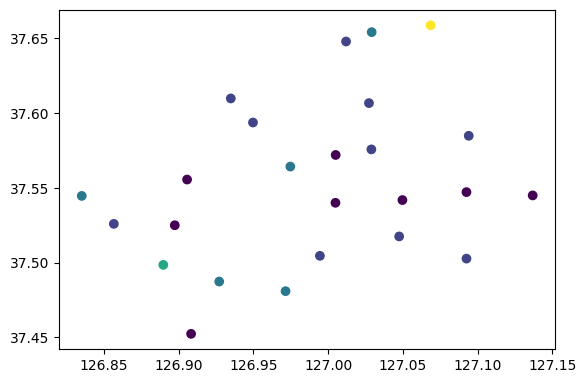

In [79]:
advanced_filtering('SO2', '2017-01-01 01').plot('Average value')

#folium

In [80]:
advanced_filtering('SO2', '2017-01-01 01').geometry.y.mean()

37.55348574

In [ ]:
ff = advanced_filtering('SO2', '2017-01-01 01')

In [81]:
ff

NameError: ignored

In [82]:
import folium

In [83]:
ff = advanced_filtering('NO2', '2017-02-05 13')
m = folium.Map([37.55, 126.98], zoom_start=12)
for i in ff.itertuples():
    marker = folium.Marker([i[5].y, i[5].x], tooltip=i[4], icon=folium.Icon(color=i[4].lower())).add_to(m)

In [85]:
ff

,Average value,Item name,Station name(district),eval,geometry
Measurement date,,,,,
2017-02-05 13:00:00,0.032,NO2,Jongno-gu,Green,POINT (127.00501 37.57202)
2017-02-05 13:00:00,0.033,NO2,Jung-gu,Green,POINT (126.97468 37.56426)
2017-02-05 13:00:00,0.030,NO2,Yongsan-gu,Blue,POINT (127.00485 37.54003)
2017-02-05 13:00:00,0.026,NO2,Eunpyeong-gu,Blue,POINT (126.93485 37.60982)
2017-02-05 13:00:00,0.026,NO2,Seodaemun-gu,Blue,POINT (126.94968 37.59374)
2017-02-05 13:00:00,0.030,NO2,Mapo-gu,Blue,POINT (126.90560 37.55558)
2017-02-05 13:00:00,0.030,NO2,Seongdong-gu,Blue,POINT (127.04966 37.54186)
2017-02-05 13:00:00,0.039,NO2,Gwangjin-gu,Green,POINT (127.09249 37.54718)
2017-02-05 13:00:00,0.028,NO2,Dongdaemun-gu,Blue,POINT (127.02888 37.57574)


In [86]:
m

In [87]:
import json

In [91]:
with open('sample_data/seoul_municipalities_geo_simple.json', encoding='utf8') as f:
    d = json.load(f)

In [93]:
dd = gpd.read_file('sample_data/seoul_municipalities_geo_simple.json')

<Axes: >

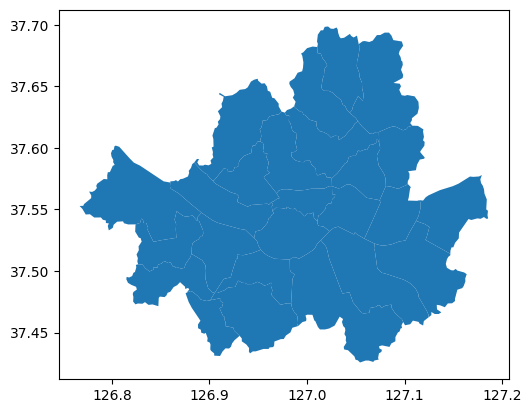

In [94]:
dd.plot()

In [95]:
dd.name_eng

0         Gangdong-gu
1           Songpa-gu
2          Gangnam-gu
3           Seocho-gu
4           Gwanak-gu
5          Dongjak-gu
6     Yeongdeungpo-gu
7        Geumcheon-gu
8             Guro-gu
9          Gangseo-gu
10       Yangcheon-gu
11            Mapo-gu
12       Seodaemun-gu
13       Eunpyeong-gu
14           Nowon-gu
15          Dobong-gu
16         Gangbuk-gu
17        Seongbuk-gu
18        Jungnang-gu
19      Dongdaemun-gu
20        Gwangjin-gu
21       Seongdong-gu
22         Yongsan-gu
23            Jung-gu
24          Jongno-gu
Name: name_eng, dtype: object

In [96]:
station['Station name(district)']

0           Jongno-gu
1             Jung-gu
2          Yongsan-gu
3        Eunpyeong-gu
4        Seodaemun-gu
5             Mapo-gu
6        Seongdong-gu
7         Gwangjin-gu
8       Dongdaemun-gu
9         Jungnang-gu
10        Seongbuk-gu
11         Gangbuk-gu
12          Dobong-gu
13           Nowon-gu
14       Yangcheon-gu
15         Gangseo-gu
16            Guro-gu
17       Geumcheon-gu
18    Yeongdeungpo-gu
19         Dongjak-gu
20          Gwanak-gu
21          Seocho-gu
22         Gangnam-gu
23          Songpa-gu
24        Gangdong-gu
Name: Station name(district), dtype: object

In [97]:
dd.rename(columns={'name_eng' : 'Station name(district)'}, inplace=True)

In [98]:
station.merge(dd)

,Station code,Station name(district),Address,Latitude,Longitude,code,name,base_year,geometry
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,11010,종로구,2013,"POLYGON ((126.97389 37.62950, 126.97718 37.628..."
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,11020,중구,2013,"POLYGON ((127.02547 37.56894, 127.02572 37.562..."
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850,11030,용산구,2013,"POLYGON ((127.01071 37.54118, 127.01044 37.539..."
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848,11120,은평구,2013,"POLYGON ((126.97389 37.62950, 126.97135 37.627..."
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679,11130,서대문구,2013,"POLYGON ((126.95248 37.60509, 126.95481 37.603..."
5,106,Mapo-gu,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",37.555580,126.905597,11140,마포구,2013,"POLYGON ((126.90522 37.57410, 126.90370 37.572..."
6,107,Seongdong-gu,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",37.541864,127.049659,11040,성동구,2013,"POLYGON ((127.02547 37.56894, 127.03182 37.567..."
7,108,Gwangjin-gu,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493,11050,광진구,2013,"POLYGON ((127.08069 37.56906, 127.08553 37.568..."
8,109,Dongdaemun-gu,"43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...",37.575743,127.028885,11060,동대문구,2013,"POLYGON ((127.02527 37.57525, 127.03122 37.579..."
9,110,Jungnang-gu,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",37.584848,127.094023,11070,중랑구,2013,"POLYGON ((127.07351 37.61284, 127.08325 37.616..."
